In [95]:
from sklearn.tree import DecisionTreeRegressor

from tqdm import tqdm
from sklearn import model_selection
import numpy as np

In [96]:
from sklearn.datasets import load_diabetes

In [97]:
X, y = load_diabetes(return_X_y=True)

In [98]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [99]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [100]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [101]:
def bias(y, z):
    return (y - z)

In [121]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in tqdm(range(n_trees)):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [103]:
import matplotlib.pyplot as plt

In [104]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [105]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction), 3)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction), 3)}')

In [106]:
plt.rcParams["figure.figsize"] = [12,5]

def get_error1_plot(n_trees, max_depth, train_err, test_err):

    plt.subplot(121)
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    
    plt.subplot(122)
    plt.xlabel('Forest depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(np.linspace(0, max_depth, n_trees), train_err, label='train error')
    plt.plot(np.linspace(0, max_depth, n_trees), test_err, label='test error')
    plt.legend(loc='upper right')
    
    plt.show()

In [113]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

100%|██████████| 30/30 [00:15<00:00,  1.89it/s]


In [122]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2831.218
Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 3973.697


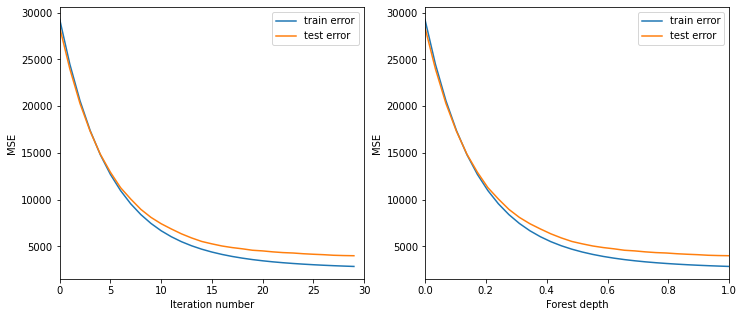

In [123]:
get_error1_plot(n_trees, max_depth, train_errors, test_errors)

In [124]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

100%|██████████| 30/30 [00:16<00:00,  1.86it/s]


In [125]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 55.073
Ошибка алгоритма из 30 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4680.201


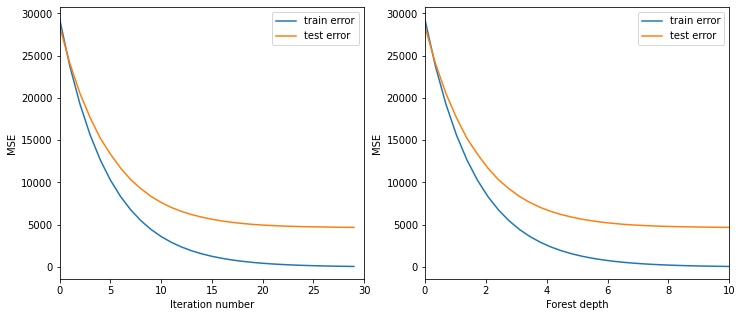

In [126]:
get_error1_plot(n_trees, max_depth, train_errors, test_errors)

In [127]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 30

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

100%|██████████| 30/30 [00:16<00:00,  1.78it/s]


In [128]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 30     с шагом 0.1 на тренировочной выборке: 52.634
Ошибка алгоритма из 30 деревьев глубиной 30     с шагом 0.1 на тестовой выборке: 5440.974


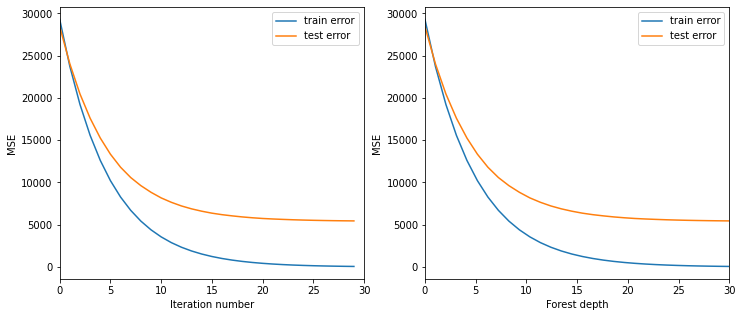

In [129]:
get_error1_plot(n_trees, max_depth, train_errors, test_errors)